# 1. Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
from IPython.display import display, display_html, HTML
from itertools import chain,cycle


CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:05.2f}'.format

In [2]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        try:
            df_str = df.to_html()
        except:
            df_str = df.render()

        html_str+=df_str.replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


# 2. Getting data

In [3]:
data = pd.read_csv('data/drafted_players.csv')

data = data.query('year > 2000')
data = data.query('year < 2018')

data['av_by_year'] = data['av'] / data['carrer_duration']
data['av_by_game'] = data['av'] / data['games']

data['av_by_year'] = data['av_by_year'].replace(np.NaN, 0.)
data['av_by_game'] = data['av_by_game'].replace(np.NaN, 0.)

data

,year,round,pick,team,player_name,position,drafted_age,college,games,years_as_starter,carrer_duration,first_team_ap,pro_bowls,av,av_by_drafted_team,first_4_years_av,av_by_year,av_by_game
765,2017,1,1,CLE,Myles Garrett,DE,21.00,1,51,4,4,1,2,36,36,38,09.00,00.71
766,2017,1,2,CHI,Mitchell Trubisky,QB,23.00,2,51,3,4,0,1,33,33,35,08.25,00.65
767,2017,1,3,SFO,Solomon Thomas,DE,22.00,3,48,2,4,0,0,15,15,16,03.75,00.31
768,2017,1,4,JAX,Leonard Fournette,RB,22.00,4,49,3,4,0,0,25,20,26,06.25,00.51
769,2017,1,5,TEN,Corey Davis,WR,22.00,5,56,4,4,0,0,25,25,26,06.25,00.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,2001,7,242,DAL,Char-ron Dorsey,T,23.00,242,12,0,2,0,0,0,0,0,00.00,00.00
5092,2001,7,243,KAN,Terdell Sands,DT,21.00,243,77,1,9,0,0,11,0,2,01.22,00.14
5093,2001,7,244,SDG,Robert Carswell,DB,22.00,244,18,0,2,0,0,0,0,0,00.00,00.00
5094,2001,7,245,CLE,Andre King,WR,27.00,245,42,0,4,0,0,2,2,2,00.50,00.05


In [4]:
data.query('av > 0').query("position == 'OL'")

,year,round,pick,team,player_name,position,drafted_age,college,games,years_as_starter,carrer_duration,first_team_ap,pro_bowls,av,av_by_drafted_team,first_4_years_av,av_by_year,av_by_game
981,2017,6,217,TEN,Corey Levin,OL,23.00,217,16,0,2,0,0,1,1,1,00.50,00.06
1569,2014,2,43,NYG,Weston Richburg,OL,23.00,43,79,5,6,0,0,32,20,22,05.33,00.41
1592,2014,3,66,WAS,Morgan Moses,OL,23.00,66,104,6,7,0,0,44,44,29,06.29,00.42
1618,2014,3,92,CAR,Trai Turner,OL,21.00,92,93,6,7,0,5,45,42,32,06.43,00.48
1619,2014,3,93,JAX,Brandon Linder,OL,22.00,93,79,5,7,0,0,30,30,20,04.29,00.38
1621,2014,3,95,DEN,Michael Schofield,OL,23.00,95,87,4,7,0,0,31,11,16,04.43,00.36
1663,2014,4,137,NYJ,Dakota Dozier,OL,23.00,137,70,1,7,0,0,14,3,2,02.00,00.20
1699,2014,5,173,PIT,Wesley Johnson,OL,23.00,173,53,1,5,0,0,12,0,11,02.40,00.23
1705,2014,6,179,NWE,Jon Halapio,OL,23.00,179,27,2,6,0,0,10,0,2,01.67,00.37
1726,2014,6,200,KAN,Laurent Duvernay-Tardif,OL,23.00,200,60,4,6,0,0,27,27,20,04.50,00.45


In [5]:
data.query('av > 0').query("position == 'DL'")

,year,round,pick,team,player_name,position,drafted_age,college,games,years_as_starter,carrer_duration,first_team_ap,pro_bowls,av,av_by_drafted_team,first_4_years_av,av_by_year,av_by_game
984,2017,7,220,MIN,Ifeadi Odenigbo,DL,23.00,220,32,1,4,0,0,9,9,9,02.25,00.28


In [6]:
data.query('av > 0').query("position == 'CB'")
data.query('av > 0').query("position == 'S'")

,year,round,pick,team,player_name,position,drafted_age,college,games,years_as_starter,carrer_duration,first_team_ap,pro_bowls,av,av_by_drafted_team,first_4_years_av,av_by_year,av_by_game
770,2017,1,6,NYJ,Jamal Adams,S,21.00,6,58,4,4,1,3,35,28,37,08.75,00.60
779,2017,1,15,IND,Malik Hooker,S,21.00,15,36,3,4,0,0,14,14,15,03.50,00.39
789,2017,1,25,CLE,Jabrill Peppers,S,21.00,25,55,4,4,0,0,20,10,21,05.00,00.36
800,2017,2,36,ARI,Budda Baker,S,21.00,36,61,3,4,2,3,33,33,35,08.25,00.54
803,2017,2,39,NYJ,Marcus Maye,S,24.00,39,54,4,4,0,0,19,19,20,04.75,00.35
806,2017,2,42,NOR,Marcus Williams,S,20.00,42,60,4,4,0,0,20,20,22,05.00,00.33
814,2017,2,50,TAM,Justin Evans,S,22.00,50,24,2,2,0,0,8,8,8,04.00,00.33
820,2017,2,56,OAK,Obi Melifonwu,S,23.00,56,7,0,2,0,0,1,1,1,00.50,00.14
825,2017,2,61,GNB,Josh Jones,S,22.00,61,48,1,4,0,0,9,5,9,02.25,00.19
855,2017,3,91,LAR,John Johnson,S,21.00,91,54,3,4,0,0,19,19,20,04.75,00.35


In [7]:
data.position.replace('C', 'iOL', inplace=True)
data.position.replace('G', 'iOL', inplace=True)
data.position.replace('OL', 'iOL', inplace=True)
data.position.replace('T', 'OT', inplace=True)

data.position.replace('DL', 'DE', inplace=True)

data.position.replace('NT', 'DT', inplace=True)

data.position.replace('OLB', 'LB', inplace=True)
data.position.replace('ILB', 'LB', inplace=True)

data.position.replace('CB', 'DB', inplace=True)
data.position.replace('S', 'DB', inplace=True)

data.position.replace('K', 'ST', inplace=True)
data.position.replace('P', 'ST', inplace=True)
data.position.replace('LS', 'ST', inplace=True)

positions = ['QB', 'WR', 'RB', 'TE', 'OT', 'iOL', 'DT', 'DE', 'LB', 'DB']

# 3. Displaying Data

In [8]:
test_data = data.copy()

del test_data['round']
del test_data['college']
del test_data['first_team_ap']
del test_data['pro_bowls']
del test_data['av_by_drafted_team']
del test_data['first_4_years_av']
del test_data['drafted_age']
del test_data['pick']
del test_data['team']
del test_data['years_as_starter']


av_based = test_data.sort_values(by=['av'], ascending=False).head(100)
year_based = test_data.sort_values(by=['av_by_year'], ascending=False).head(100)
game_based = test_data.sort_values(by=['av_by_game'], ascending=False).head(100)
display_side_by_side(av_based, year_based, game_based, titles=['AV', 'Year', 'Game'])

,year,player_name,position,games,carrer_duration,av,av_by_year,av_by_game
4881,2001,Drew Brees,QB,287,20,167,08.35,00.58
3840,2005,Aaron Rodgers,QB,197,16,151,09.44,00.77
4075,2004,Philip Rivers,QB,244,17,149,08.76,00.61
3057,2008,Matt Ryan,QB,205,13,140,10.77,00.68
4590,2002,Julius Peppers,DE,266,17,129,07.59,00.48
4854,2001,LaDainian Tomlinson HOF,RB,170,11,128,11.64,00.75
4082,2004,Ben Roethlisberger,QB,233,17,128,07.53,00.55
2111,2012,Russell Wilson,QB,144,9,120,13.33,00.83
4072,2004,Eli Manning,QB,236,16,118,07.38,00.50
4879,2001,Reggie Wayne,WR,211,14,117,08.36,00.55


# 4. Plotting data

<AxesSubplot:xlabel='drafted_age', ylabel='av_by_game'>

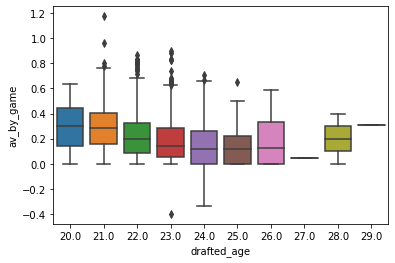

In [9]:
sns.boxplot(x="drafted_age", y="av_by_game", data=data)

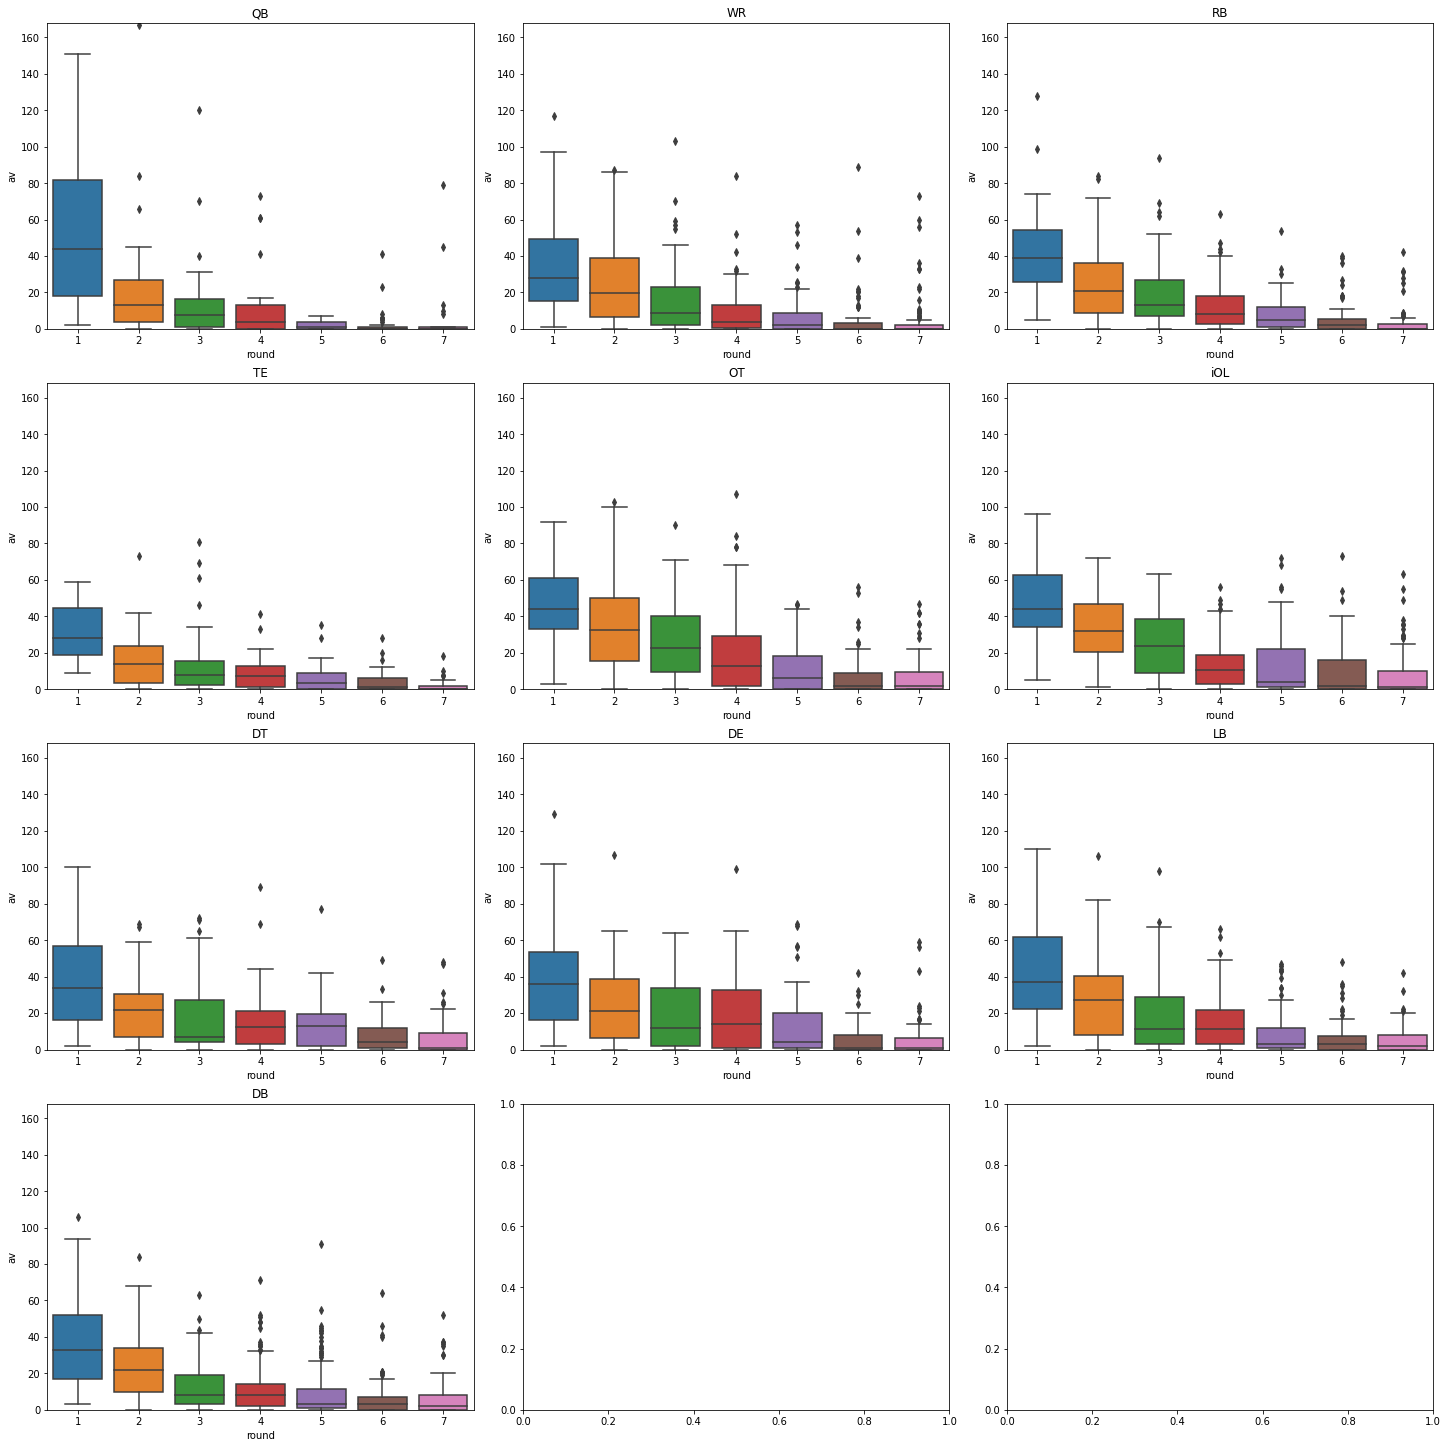

In [12]:
def box_plot_round_by_position(positions, data, target='av'):
    max_y = data[target].max() + 1

    w = 3
    h = len(positions) / w
    if len(positions) % w != 0:
        h += 1
    h = int(h)
    fig, axs = plt.subplots(h, w, figsize=(20,20), constrained_layout=True)

    for i, position in enumerate(positions):
        x = int(i / 3)
        y = i % 3

        position_data = data.loc[data['position'] == position]
        ax = axs[x][y]
        ax.set_ylim([0, max_y])
        ax.set_xlim([0, 7])

        sns.boxplot(x="round", y=target, data=position_data, ax=ax).set_title(position)

    plt.show()
    
box_plot_round_by_position(positions, data)

In [11]:
def background_gradient(s, m=None, M=None, cmap='PuBu', low=0, high=0):
    if m is None:
        m = s.min().min()
    if M is None:
        M = s.max().max()
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = s.apply(norm)

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    ret = c.applymap(lambda x: 'background-color: %s' % x)
    return ret


def get_percentiles(data, percentiles):
    ret = []
    for p in percentiles:
        ret.append(round(np.percentile(data, int(p)), 2))

    return ret

def print_percentiles(positions, target='av_by_game'):
    for position in positions:
        print(position)
        position_data = data.loc[data['position'] == position]

        percentiles = ['90', '75', '50', '25']

        rounds = {}
        for rnd in range(1,8):
            rounds[rnd] = []
            avs = position_data.loc[data['round'] == rnd][target]
            rounds[rnd] = get_percentiles(avs, percentiles)
        
        overall = {}
        overall['overall'] = get_percentiles(position_data[target], percentiles)
        overall['non-zero av'] = get_percentiles(position_data.query(f"{target} != 0")[target], percentiles)


        df = pd.DataFrame(data=rounds)
        ovr_df = pd.DataFrame(data=overall)

        for i in range(len(percentiles)):
            df = df.rename({i: percentiles[i] + 'th'}, axis='index')
            ovr_df = ovr_df.rename({i: percentiles[i] + 'th'}, axis='index')
        
        df = df.style.apply(background_gradient, axis=None)
#         ovr_df = ovr_df.style.apply(background_gradient, axis=None)

        display_side_by_side(df, ovr_df, titles=['By round', 'Overall'])
        
print_percentiles(positions)

QB


By round 1 2 3 4 5 6 7 
 
 90th 
 0.730000 
 0.590000 
 0.470000 
 0.670000 
 0.270000 
 0.340000 
 0.480000 
 
 
 75th 
 0.650000 
 0.480000 
 0.450000 
 0.310000 
 0.250000 
 0.250000 
 0.100000 
 
 
 50th 
 0.550000 
 0.350000 
 0.310000 
 0.130000 
 0.140000 
 0.000000 
 0.000000 
 
 
 25th 
 0.410000 
 0.150000 
 0.090000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.62 
 00.66 
 
 
 75th 
 00.47 
 00.55 
 
 
 50th 
 00.25 
 00.37 
 
 
 25th 
 00.00 
 00.25

WR


By round 1 2 3 4 5 6 7 
 
 90th 
 0.540000 
 0.460000 
 0.400000 
 0.310000 
 0.260000 
 0.190000 
 0.210000 
 
 
 75th 
 0.450000 
 0.370000 
 0.300000 
 0.230000 
 0.190000 
 0.120000 
 0.120000 
 
 
 50th 
 0.350000 
 0.260000 
 0.160000 
 0.120000 
 0.070000 
 0.000000 
 0.000000 
 
 
 25th 
 0.250000 
 0.150000 
 0.070000 
 0.020000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.41 
 00.45 
 
 
 75th 
 00.27 
 00.33 
 
 
 50th 
 00.13 
 00.20 
 
 
 25th 
 00.00 
 00.11

RB


By round 1 2 3 4 5 6 7 
 
 90th 
 0.620000 
 0.590000 
 0.540000 
 0.400000 
 0.370000 
 0.270000 
 0.220000 
 
 
 75th 
 0.540000 
 0.430000 
 0.400000 
 0.280000 
 0.290000 
 0.150000 
 0.080000 
 
 
 50th 
 0.460000 
 0.300000 
 0.280000 
 0.170000 
 0.170000 
 0.050000 
 0.000000 
 
 
 25th 
 0.350000 
 0.200000 
 0.170000 
 0.080000 
 0.050000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.50 
 00.54 
 
 
 75th 
 00.34 
 00.38 
 
 
 50th 
 00.18 
 00.25 
 
 
 25th 
 00.03 
 00.14

TE


By round 1 2 3 4 5 6 7 
 
 90th 
 0.360000 
 0.320000 
 0.310000 
 0.240000 
 0.140000 
 0.170000 
 0.080000 
 
 
 75th 
 0.300000 
 0.240000 
 0.180000 
 0.190000 
 0.110000 
 0.100000 
 0.030000 
 
 
 50th 
 0.260000 
 0.180000 
 0.110000 
 0.060000 
 0.060000 
 0.030000 
 0.000000 
 
 
 25th 
 0.210000 
 0.070000 
 0.050000 
 0.040000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.26 
 00.30 
 
 
 75th 
 00.15 
 00.21 
 
 
 50th 
 00.07 
 00.12 
 
 
 25th 
 00.00 
 00.06

OT


By round 1 2 3 4 5 6 7 
 
 90th 
 0.580000 
 0.560000 
 0.500000 
 0.470000 
 0.380000 
 0.390000 
 0.380000 
 
 
 75th 
 0.520000 
 0.480000 
 0.390000 
 0.380000 
 0.310000 
 0.230000 
 0.290000 
 
 
 50th 
 0.460000 
 0.390000 
 0.290000 
 0.240000 
 0.210000 
 0.110000 
 0.110000 
 
 
 25th 
 0.380000 
 0.280000 
 0.170000 
 0.060000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.50 
 00.53 
 
 
 75th 
 00.42 
 00.45 
 
 
 50th 
 00.27 
 00.34 
 
 
 25th 
 00.10 
 00.21

iOL


By round 1 2 3 4 5 6 7 
 
 90th 
 0.580000 
 0.460000 
 0.480000 
 0.390000 
 0.340000 
 0.370000 
 0.360000 
 
 
 75th 
 0.540000 
 0.420000 
 0.400000 
 0.330000 
 0.260000 
 0.270000 
 0.260000 
 
 
 50th 
 0.410000 
 0.380000 
 0.320000 
 0.230000 
 0.160000 
 0.090000 
 0.070000 
 
 
 25th 
 0.350000 
 0.300000 
 0.250000 
 0.120000 
 0.060000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.43 
 00.46 
 
 
 75th 
 00.36 
 00.38 
 
 
 50th 
 00.25 
 00.30 
 
 
 25th 
 00.05 
 00.20

DT


By round 1 2 3 4 5 6 7 
 
 90th 
 0.500000 
 0.430000 
 0.410000 
 0.330000 
 0.350000 
 0.300000 
 0.250000 
 
 
 75th 
 0.440000 
 0.340000 
 0.300000 
 0.260000 
 0.300000 
 0.200000 
 0.170000 
 
 
 50th 
 0.360000 
 0.250000 
 0.190000 
 0.200000 
 0.170000 
 0.140000 
 0.070000 
 
 
 25th 
 0.260000 
 0.150000 
 0.110000 
 0.110000 
 0.110000 
 0.070000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.41 
 00.43 
 
 
 75th 
 00.30 
 00.32 
 
 
 50th 
 00.19 
 00.22 
 
 
 25th 
 00.09 
 00.14

DE


By round 1 2 3 4 5 6 7 
 
 90th 
 0.540000 
 0.420000 
 0.390000 
 0.390000 
 0.350000 
 0.280000 
 0.250000 
 
 
 75th 
 0.440000 
 0.330000 
 0.310000 
 0.310000 
 0.230000 
 0.150000 
 0.130000 
 
 
 50th 
 0.340000 
 0.220000 
 0.190000 
 0.220000 
 0.140000 
 0.070000 
 0.070000 
 
 
 25th 
 0.270000 
 0.150000 
 0.090000 
 0.070000 
 0.070000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.41 
 00.43 
 
 
 75th 
 00.31 
 00.33 
 
 
 50th 
 00.18 
 00.23 
 
 
 25th 
 00.07 
 00.12

LB


By round 1 2 3 4 5 6 7 
 
 90th 
 0.720000 
 0.500000 
 0.430000 
 0.370000 
 0.330000 
 0.290000 
 0.200000 
 
 
 75th 
 0.530000 
 0.410000 
 0.310000 
 0.310000 
 0.210000 
 0.160000 
 0.130000 
 
 
 50th 
 0.410000 
 0.310000 
 0.210000 
 0.180000 
 0.100000 
 0.080000 
 0.080000 
 
 
 25th 
 0.320000 
 0.180000 
 0.110000 
 0.090000 
 0.050000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.43 
 00.45 
 
 
 75th 
 00.31 
 00.34 
 
 
 50th 
 00.16 
 00.20 
 
 
 25th 
 00.08 
 00.10

DB


By round 1 2 3 4 5 6 7 
 
 90th 
 0.550000 
 0.380000 
 0.320000 
 0.310000 
 0.300000 
 0.210000 
 0.260000 
 
 
 75th 
 0.380000 
 0.330000 
 0.250000 
 0.220000 
 0.210000 
 0.140000 
 0.170000 
 
 
 50th 
 0.320000 
 0.280000 
 0.160000 
 0.140000 
 0.090000 
 0.090000 
 0.090000 
 
 
 25th 
 0.270000 
 0.190000 
 0.090000 
 0.070000 
 0.030000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 00.35 
 00.36 
 
 
 75th 
 00.27 
 00.29 
 
 
 50th 
 00.15 
 00.19 
 
 
 25th 
 00.07 
 00.10